In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from classes import Paths

pd.set_option('display.float_format', "{:,.2f}".format)

In [3]:
paths = Paths()
path = paths.stratified_valid
df = pd.read_csv(path)
display(df.head())
X = df.drop(columns=['target_reg'])
y = df['target_reg']
display(X.head())
display(y.head())
display(df.head())

,car_id,target_reg,num_fold
0,y13744087j,"9,492.96",NaN
1,O41613818T,"2,656.23",NaN
2,d-2109686j,"1,526.11",NaN
3,u29695600e,"1,338.00",NaN
4,N-8915870N,825.72,NaN


,car_id,num_fold
0,y13744087j,NaN
1,O41613818T,NaN
2,d-2109686j,NaN
3,u29695600e,NaN
4,N-8915870N,NaN


0   9,492.96
1   2,656.23
2   1,526.11
3   1,338.00
4     825.72
Name: target_reg, dtype: float64

,car_id,target_reg,num_fold
0,y13744087j,"9,492.96",NaN
1,O41613818T,"2,656.23",NaN
2,d-2109686j,"1,526.11",NaN
3,u29695600e,"1,338.00",NaN
4,N-8915870N,825.72,NaN


In [4]:
from sklearn.model_selection import StratifiedKFold

In [5]:
df['num_fold'] = pd.qcut(df['target_reg'], q=10, labels=False)
df

,car_id,target_reg,num_fold
0,y13744087j,"9,492.96",9
1,O41613818T,"2,656.23",5
2,d-2109686j,"1,526.11",3
3,u29695600e,"1,338.00",2
4,N-8915870N,825.72,1
...,...,...,...
2332,j21246192N,547.30,0
2333,h-1554287F,"26,414.19",9
2334,A15262612g,"2,677.95",5
2335,W-2514493U,"2,213.63",4


In [6]:
num_bins=10
df['target_bin'] = pd.qcut(df['target_reg'], q=num_bins, labels=False)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a new column for fold numbers
df['num_fold'] = -1

# Assign fold numbers
for fold_number, (train_index, test_index) in enumerate(skf.split(df, df['target_bin'])):
    df.loc[test_index, 'num_fold'] = fold_number

# Drop the temporary target_bin column
df = df.drop(columns=['target_bin'])
df

,car_id,target_reg,num_fold
0,y13744087j,"9,492.96",2
1,O41613818T,"2,656.23",4
2,d-2109686j,"1,526.11",9
3,u29695600e,"1,338.00",9
4,N-8915870N,825.72,9
...,...,...,...
2332,j21246192N,547.30,5
2333,h-1554287F,"26,414.19",4
2334,A15262612g,"2,677.95",6
2335,W-2514493U,"2,213.63",6


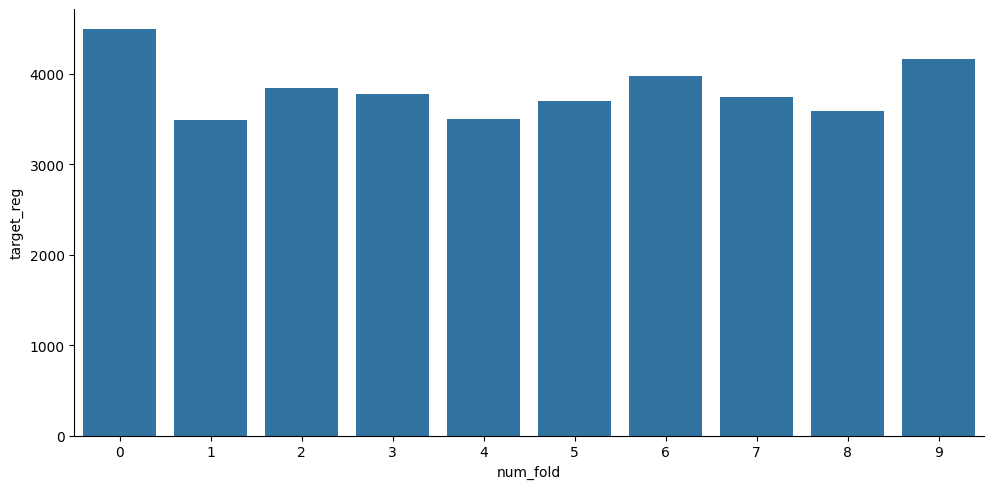

In [7]:
tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [8]:
df.to_csv('02.4.08 - answers.csv', index=False)